In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
from dbfread import DBF
from jenkspy import jenks_breaks
import matplotlib.pyplot as plt

# 2023

In [5]:
aforos_ruta = r"Z:\AMIM\Alejandro\Docs\EMCA\EMCA23\Resultados\ANEXOS\Aforos Ciclistas.xlsx"

aforos_23_df = pd.read_excel(aforos_ruta)

aforos_23_df

,Punto,Hora,Tipo de Bicicleta,Sexo aparente,Edad aparente,Origen,Destino
0,1,6:30 a 6:45 am,Montaña,Hombre,25 - 64 año,M2,M4
1,1,9:00 a 9:15 pm,Ruta,Hombre,25 - 64 año,M2,M4
2,1,2:15 a 2:30 pm,Montaña,Hombre,25 - 64 año,M4,M2
3,1,8:30 a 8:45 pm,Montaña,Hombre,25 - 64 año,M2,M4
4,1,8:45 a 9:00 am,Urbana,Hombre,25 - 64 año,M2,M4
...,...,...,...,...,...,...,...
53070,85,NaN,NaN,NaN,NaN,NaN,NaN
53071,85,NaN,NaN,NaN,NaN,NaN,NaN
53072,85,NaN,NaN,NaN,NaN,NaN,NaN
53073,85,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Número total de registros
total_registros = len(aforos_23_df)

# Número de puntos únicos
puntos_unicos = aforos_23_df['Punto'].nunique()

# Calcular el promedio de registros por punto
promedio_registros_por_punto = total_registros / puntos_unicos

promedio_registros_por_punto

610.0574712643678

### Por punto

C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_1832\2839034523.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervalos_punto_datetime = pd.to_datetime(conteo_punto_por_intervalo.index)
C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_1832\2839034523.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo_punto_por_intervalo_sorted = conteo_punto_por_intervalo[intervalos_punto_datetime.argsort()]


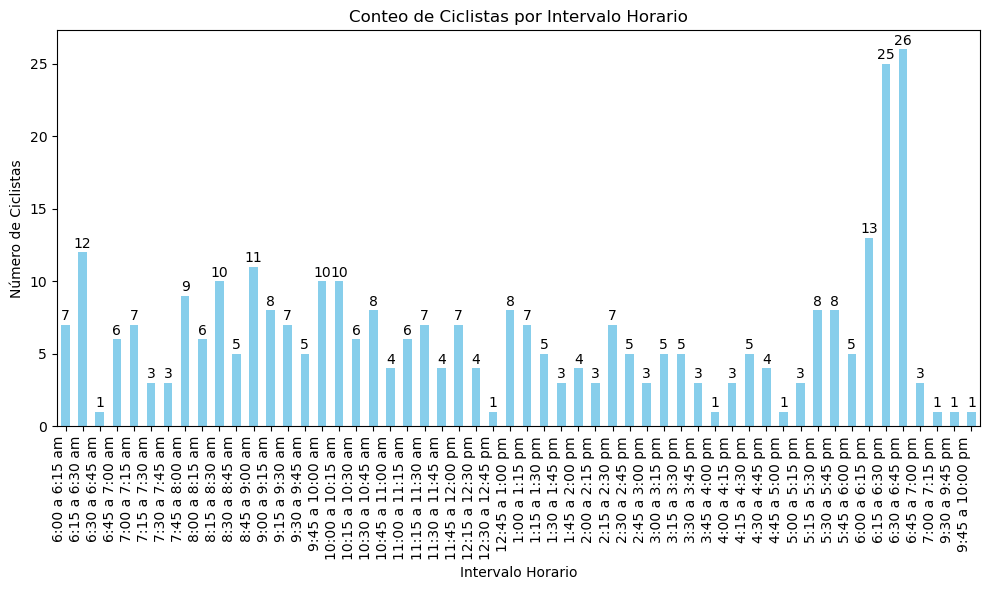

total aforos: 333


In [31]:
punto = 76
#Seleccionar punto
Punto_df = aforos_23_df.loc[aforos_23_df['Punto'].isin([punto])]

#Hacer por hora
conteo_punto_por_intervalo = Punto_df.groupby('Hora').size()

# Convertir los intervalos horarios a objetos datetime
intervalos_punto_datetime = pd.to_datetime(conteo_punto_por_intervalo.index)

# Ordenar los intervalos horarios
conteo_punto_por_intervalo_sorted = conteo_punto_por_intervalo[intervalos_punto_datetime.argsort()]

# # Crear un índice con todas las horas posibles
# horas_posibles = pd.date_range(start=conteo_punto_por_intervalo_sorted.index.min(),
#                                end=conteo_punto_por_intervalo_sorted.index.max(),
#                                freq='H')

# # Reindexar la serie de conteo para que incluya todas las horas posibles
# conteo_punto_reindexado = conteo_punto_por_intervalo_sorted.reindex(horas_posibles, fill_value=0)

# Graficar el conteo de ciclistas por intervalo horario
plt.figure(figsize=(10, 6))
ax = conteo_punto_por_intervalo_sorted.plot(kind='bar', color='skyblue')
plt.title('Conteo de Ciclistas por Intervalo Horario')
plt.xlabel('Intervalo Horario')
plt.ylabel('Número de Ciclistas')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Añadir etiquetas a cada barra con su valor
for i, v in enumerate(conteo_punto_por_intervalo_sorted):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()
print('total aforos:', Punto_df['Punto'].count())


In [35]:
Aforo = pd.DataFrame(conteo_punto_por_intervalo_sorted)

In [43]:
Aforo=Aforo.rename(columns={0:'Ciclistas'})

In [44]:
Aforo

,Ciclistas
Hora,
6:00 a 6:15 am,15
6:15 a 6:30 am,9
6:30 a 6:45 am,27
6:45 a 7:00 am,23
7:00 a 7:15 am,43
...,...
8:45 a 9:00 pm,16
9:00 a 9:15 pm,13
9:15 a 9:30 pm,7


In [46]:
Aforo['Hora'] = Aforo.index

Aforo.to_csv(r"C:\Users\UTIC\Documents\Alejandro\Docs\DATA\Afo_Pt70_23.csv", index=False)    

### Total

C:\Users\UTIC\AppData\Local\Temp\ipykernel_15100\2233247053.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervalos_datetime = pd.to_datetime(conteo_ciclistas_por_intervalo.index)


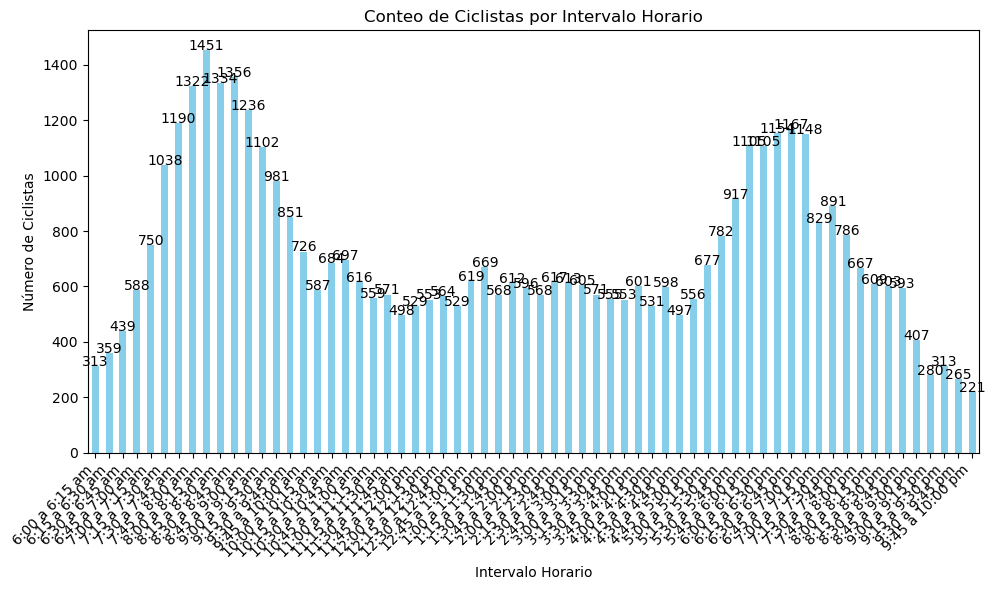

total aforos: 45871


In [13]:
conteo_ciclistas_por_intervalo = aforos_23_df.groupby('Hora').size()

# Convertir los intervalos horarios a objetos datetime
intervalos_datetime = pd.to_datetime(conteo_ciclistas_por_intervalo.index)

# Ordenar los intervalos horarios
conteo_ciclistas_por_intervalo_sorted = conteo_ciclistas_por_intervalo[intervalos_datetime.argsort()]

# Graficar el conteo de ciclistas por intervalo horario
plt.figure(figsize=(10, 6))
ax = conteo_ciclistas_por_intervalo_sorted.plot(kind='bar', color='skyblue')
plt.title('Conteo de Ciclistas por Intervalo Horario')
plt.xlabel('Intervalo Horario')
plt.ylabel('Número de Ciclistas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir etiquetas a cada barra con su valor
for i, v in enumerate(conteo_ciclistas_por_intervalo_sorted):
    ax.text(i, v + 0.1, str(v), ha='center')

plt.show()

print('total aforos:', conteo_ciclistas_por_intervalo_sorted.sum())

# 2022

In [16]:
aforos_ruta = r"C:\Users\UTIC\Documents\Alejandro\Docs\EMCA\EMCA22\Resultados\Aforo BBD Microdatos.xlsx"

aforos_22_df = pd.read_excel(aforos_ruta)

aforos_22_df

,ID,Hora inicio,Sexo Aparente,Edad Aparente,Movimiento,Tipo de Bicicleta,Municipio,Codigo
0,40513,06:00:00,M,4,24,Bici Pública,Guadalajara,GDL_01
1,40514,06:00:00,H,4,24,Bici Pública,Guadalajara,GDL_01
2,40515,06:00:00,H,4,24,Bici Pública,Guadalajara,GDL_01
3,40516,06:00:00,H,4,32,Montaña,Guadalajara,GDL_01
4,40517,06:00:00,H,4,32,Bici Pública,Guadalajara,GDL_01
...,...,...,...,...,...,...,...,...
52273,48881,20:30:00,H,4,32,Montaña,Zapopan,ZPN_24
52274,48882,20:30:00,H,4,32,Montaña,Zapopan,ZPN_24
52275,48883,20:45:00,H,4,32,Montaña,Zapopan,ZPN_24
52276,48884,20:45:00,H,4,32,Montaña,Zapopan,ZPN_24


In [18]:
# Número total de registros
total_registros = len(aforos_22_df)

# Número de puntos únicos
puntos_unicos = aforos_22_df['Codigo'].nunique()

# Calcular el promedio de registros por punto
promedio_registros_por_punto = total_registros / puntos_unicos

promedio_registros_por_punto

629.855421686747

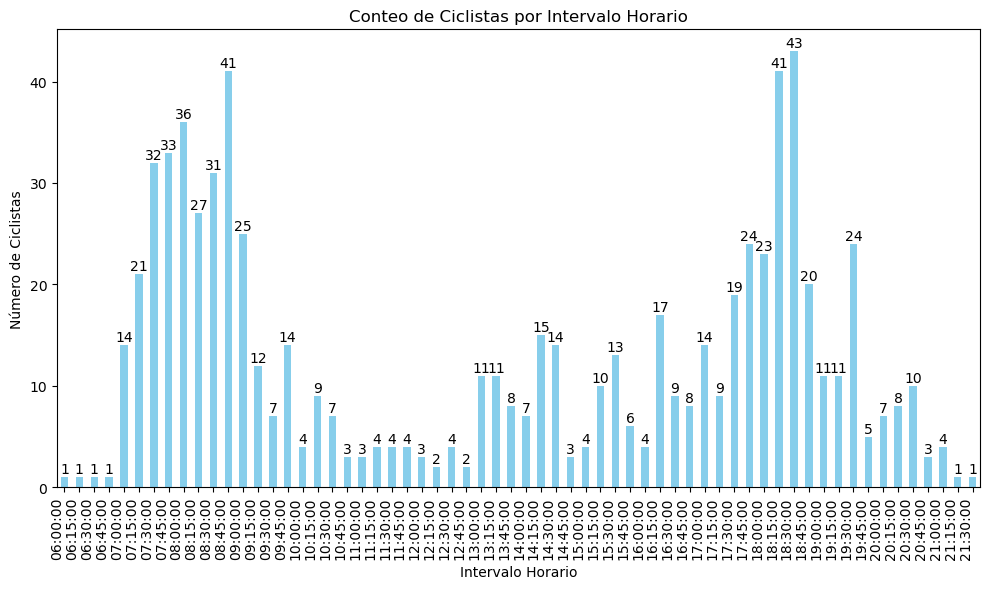

total aforos: 764


In [25]:
punto = 'ZPN_19'
#Seleccionar punto
Punto_df = aforos_22_df.loc[aforos_22_df['Codigo'].isin([punto])]

#Hacer por hora
conteo_punto_por_intervalo = Punto_df.groupby('Hora inicio').size()

# Graficar el conteo de ciclistas por intervalo horario
plt.figure(figsize=(10, 6))
ax = conteo_punto_por_intervalo.plot(kind='bar', color='skyblue')
plt.title('Conteo de Ciclistas por Intervalo Horario')
plt.xlabel('Intervalo Horario')
plt.ylabel('Número de Ciclistas')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Añadir etiquetas a cada barra con su valor
for i, v in enumerate(conteo_punto_por_intervalo):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()
print('total aforos:', conteo_punto_por_intervalo.sum())

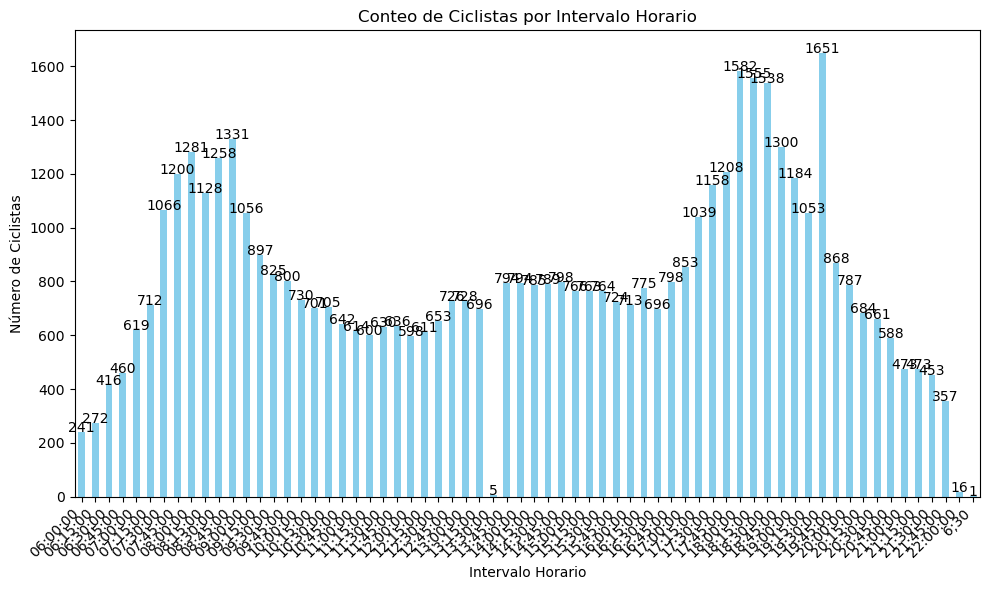

total aforos: 52278


In [26]:
conteo_ciclistas_por_intervalo = aforos_22_df.groupby('Hora inicio').size()

# Graficar el conteo de ciclistas por intervalo horario
plt.figure(figsize=(10, 6))
ax = conteo_ciclistas_por_intervalo.plot(kind='bar', color='skyblue')
plt.title('Conteo de Ciclistas por Intervalo Horario')
plt.xlabel('Intervalo Horario')
plt.ylabel('Número de Ciclistas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir etiquetas a cada barra con su valor
for i, v in enumerate(conteo_ciclistas_por_intervalo):
    ax.text(i, v + 0.1, str(v), ha='center')

plt.show()

print('total aforos:', conteo_ciclistas_por_intervalo.sum())

# 2021

In [19]:
aforos_ruta = r"C:\Users\UTIC\Documents\Alejandro\Docs\EMCA\EMCA 21\Resultados\Aforos 2021.xlsx"

aforos_21_df = pd.read_excel(aforos_ruta)

aforos_21_df

,date,endDate,incompleteResultLabel,resultId,device,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,2022-01-17 16:36:39,2022-01-17 16:37:46,False,41681213,NL57,44,6:00 a 6:15 am,1,1,3,1,4
1,2022-01-17 17:15:48,2022-01-17 17:16:48,False,41681293,NL62,45,6:00 a 6:15 am,7,1,4,4,4
2,2022-01-16 16:41:51,2022-01-16 16:42:37,False,41682103,NL30,0,6:00 a 6:15 am,5,2,2,2,5
3,2022-01-17 23:10:26,2022-01-17 23:13:40,False,41682115,NL51,1,6:00 a 6:15 am,1,1,3,2,4
4,2022-01-15 13:38:49,2022-01-15 13:39:40,False,41682310,NL31,2,6:00 a 6:15 am,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
42227,2022-01-28 18:36:05,2022-01-28 18:36:26,False,41790995,NL31,47,9:00 a 9:15 pm,1,1,4,4,9
42228,2022-01-28 18:36:51,2022-01-28 18:37:30,False,41790996,NL31,47,9:00 a 9:15 pm,1,1,4,4,9
42229,2022-01-28 18:35:46,2022-01-28 18:36:04,False,41790997,NL31,47,9:00 a 9:15 pm,1,1,4,4,9
42230,2022-01-28 18:39:50,2022-01-28 18:40:13,False,41790998,NL31,47,9:00 a 9:15 pm,1,1,4,4,9


C:\Users\UTIC\AppData\Local\Temp\ipykernel_15096\2605740951.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervalos_datetime = pd.to_datetime(conteo_ciclistas_por_intervalo.index)


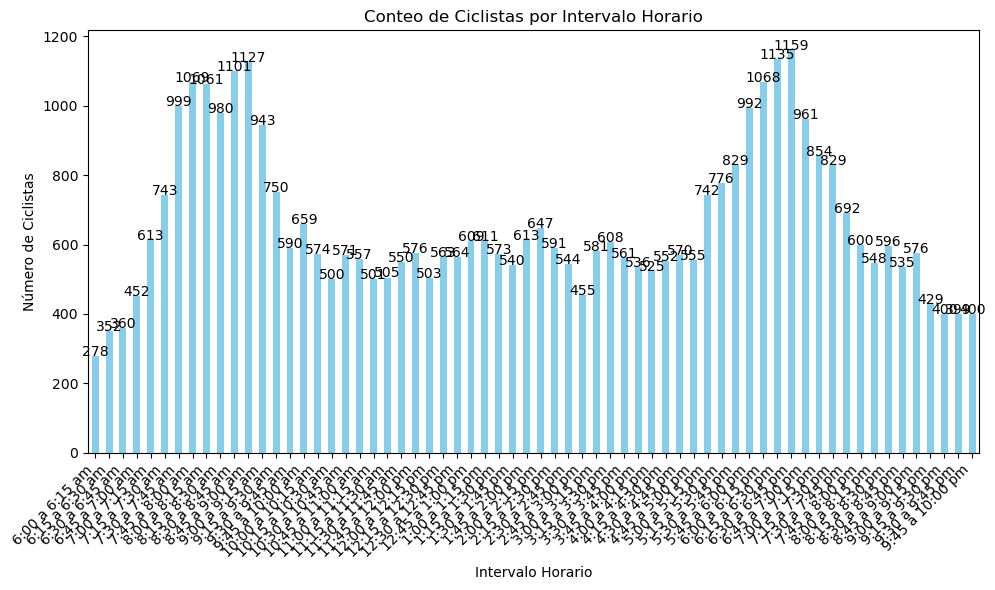

total aforos: 42232


In [54]:
conteo_ciclistas_por_intervalo = aforos_21_df.groupby('Q2').size()

# Convertir los intervalos horarios a objetos datetime
intervalos_datetime = pd.to_datetime(conteo_ciclistas_por_intervalo.index)

# Ordenar los intervalos horarios
conteo_ciclistas_por_intervalo_sorted = conteo_ciclistas_por_intervalo[intervalos_datetime.argsort()]

# Graficar el conteo de ciclistas por intervalo horario
plt.figure(figsize=(10, 6))
ax = conteo_ciclistas_por_intervalo_sorted.plot(kind='bar', color='skyblue')
plt.title('Conteo de Ciclistas por Intervalo Horario')
plt.xlabel('Intervalo Horario')
plt.ylabel('Número de Ciclistas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir etiquetas a cada barra con su valor
for i, v in enumerate(conteo_ciclistas_por_intervalo_sorted):
    ax.text(i, v + 0.1, str(v), ha='center')

plt.show()

print('total aforos:', conteo_ciclistas_por_intervalo_sorted.sum())

In [20]:
# Número total de registros
total_registros = len(aforos_21_df)

# Número de puntos únicos
puntos_unicos = aforos_21_df['Q1'].nunique()

# Calcular el promedio de registros por punto
promedio_registros_por_punto = total_registros / puntos_unicos

promedio_registros_por_punto

521.3827160493827

In [49]:

def por_punto_datetime(punto,aforo_df):
    #Seleccionar punto
    Punto_df = aforo_df.loc[aforo_df['Q1'].isin([punto])]
    
    #Hacer por hora
    conteo_punto_por_intervalo = Punto_df.groupby('Q2').size()
    
    # Convertir los intervalos horarios a objetos datetime
    intervalos_punto_datetime = pd.to_datetime(conteo_punto_por_intervalo.index)
    
    # Ordenar los intervalos horarios
    conteo_punto_por_intervalo_sorted = conteo_punto_por_intervalo[intervalos_punto_datetime.argsort()]
    
    
    
    # Graficar el conteo de ciclistas por intervalo horario
    plt.figure(figsize=(10, 6))
    ax = conteo_punto_por_intervalo_sorted.plot(kind='bar', color='skyblue')
    plt.title('Conteo de Ciclistas por Intervalo Horario')
    plt.xlabel('Intervalo Horario')
    plt.ylabel('Número de Ciclistas')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    
    # Añadir etiquetas a cada barra con su valor
    for i, v in enumerate(conteo_punto_por_intervalo_sorted):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
    plt.show()
    print('total aforos:', conteo_punto_por_intervalo_sorted.sum())
    print(conteo_punto_por_intervalo_sorted)

C:\Users\UTIC\AppData\Local\Temp\ipykernel_15096\3009132867.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervalos_punto_datetime = pd.to_datetime(conteo_punto_por_intervalo.index)


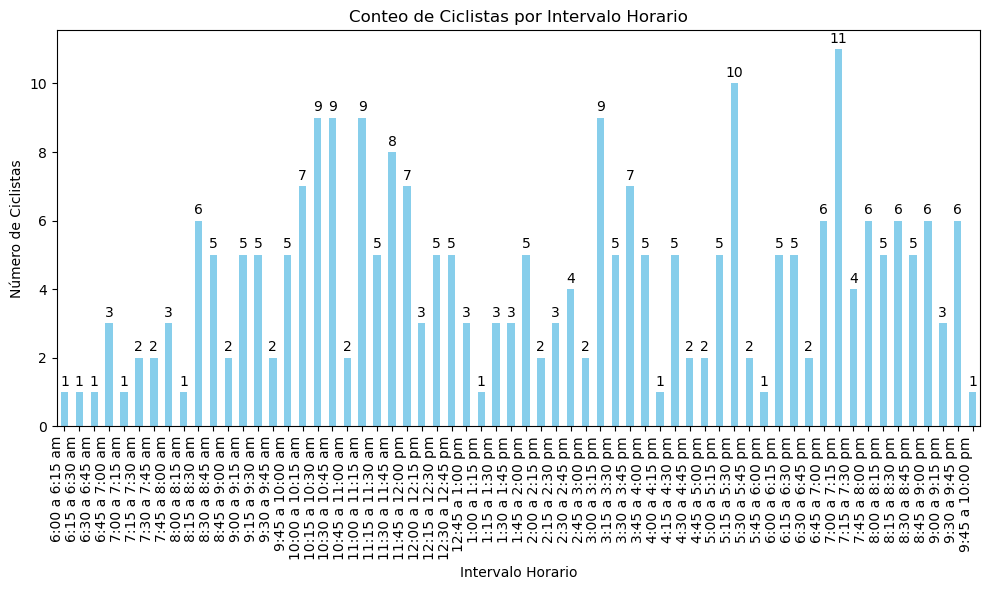

total aforos: 265


In [65]:
por_punto(70,aforos_21_df)

# 2020

In [21]:
aforos_ruta = r"C:\Users\UTIC\Documents\Alejandro\Docs\EMCA\EMCA 20\Resultados\final aforos 2020.xlsx"

aforos_20_df = pd.read_excel(aforos_ruta)

aforos_20_df

,resultId,device,Q1,Q2,Q3,Q4,Q5,Origen,Destino,filter_$
0,31650869,NL01,0,6:00 a 6:15 am,Montaña,Hombre,25 - 64 años,M4,M2,Not Selected
1,31650871,NL01,0,6:00 a 6:15 am,Montaña,Hombre,25 - 64 años,M4,M2,Not Selected
2,31650872,NL01,0,6:00 a 6:15 am,Montaña,Hombre,25 - 64 años,M4,M2,Not Selected
3,31650873,NL01,0,6:00 a 6:15 am,Montaña,Hombre,25 - 64 años,M2,M4,Not Selected
4,31650874,NL01,0,6:00 a 6:15 am,Montaña,Hombre,25 - 64 años,M2,M3,Not Selected
...,...,...,...,...,...,...,...,...,...,...
28030,31654603,NL17,47,7:15 a 7:30 am,Bicicleta con soporte,Hombre,25 - 64 años,M3,M1,Not Selected
28031,31654604,NL17,47,7:15 a 7:30 am,Bici pública,Hombre,25 - 64 años,M1,M3,Not Selected
28032,31654605,NL17,47,7:15 a 7:30 am,Montaña,Mujer,15 - 24 años,M3,M1,Not Selected
28033,31654606,NL17,47,7:30 a 7:45 am,Montaña,Hombre,25 - 64 años,M1,M3,Not Selected


In [22]:
# Número total de registros
total_registros = len(aforos_20_df)

# Número de puntos únicos
puntos_unicos = aforos_20_df['Q1'].nunique()

# Calcular el promedio de registros por punto
promedio_registros_por_punto = total_registros / puntos_unicos

promedio_registros_por_punto

683.780487804878

C:\Users\UTIC\AppData\Local\Temp\ipykernel_6252\3496908430.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervalos_datetime = pd.to_datetime(conteo_ciclistas_por_intervalo.index)


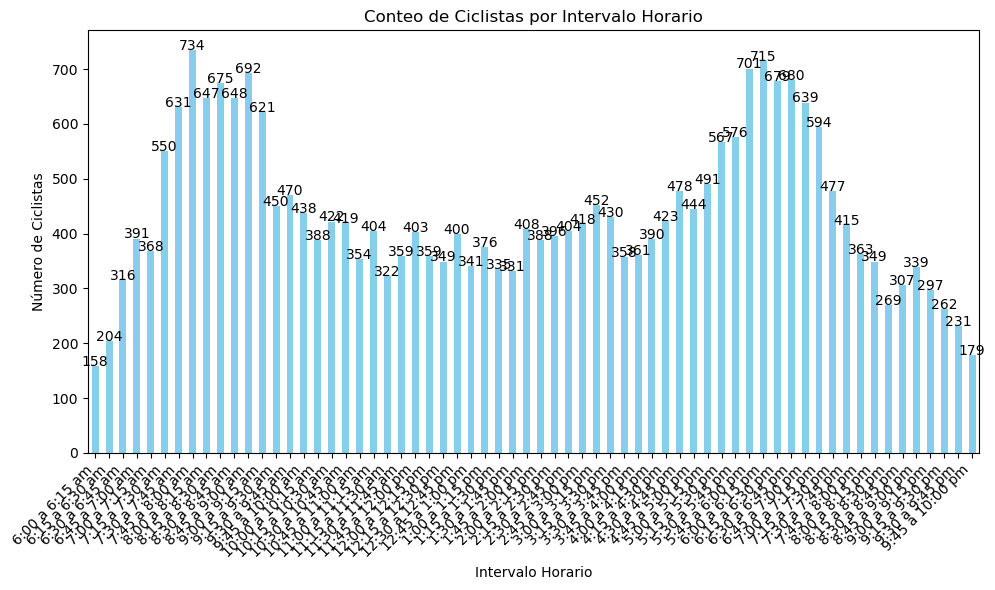

total aforos: 28035


In [4]:
conteo_ciclistas_por_intervalo = aforos_20_df.groupby('Q2').size()

# Convertir los intervalos horarios a objetos datetime
intervalos_datetime = pd.to_datetime(conteo_ciclistas_por_intervalo.index)

# Ordenar los intervalos horarios
conteo_ciclistas_por_intervalo_sorted = conteo_ciclistas_por_intervalo[intervalos_datetime.argsort()]

# Graficar el conteo de ciclistas por intervalo horario
plt.figure(figsize=(10, 6))
ax = conteo_ciclistas_por_intervalo_sorted.plot(kind='bar', color='skyblue')
plt.title('Conteo de Ciclistas por Intervalo Horario')
plt.xlabel('Intervalo Horario')
plt.ylabel('Número de Ciclistas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir etiquetas a cada barra con su valor
for i, v in enumerate(conteo_ciclistas_por_intervalo_sorted):
    ax.text(i, v + 0.1, str(v), ha='center')

plt.show()

print('total aforos:', conteo_ciclistas_por_intervalo_sorted.sum())

In [11]:

def por_punto_datetime(punto,aforo_df):
    #Seleccionar punto
    Punto_df = aforo_df.loc[aforo_df['Q1'].isin([punto])]
    
    #Hacer por hora
    conteo_punto_por_intervalo = Punto_df.groupby('Q2').size()
    
    # Convertir los intervalos horarios a objetos datetime
    intervalos_punto_datetime = pd.to_datetime(conteo_punto_por_intervalo.index)
    
    # Ordenar los intervalos horarios
    conteo_punto_por_intervalo_sorted = conteo_punto_por_intervalo[intervalos_punto_datetime.argsort()]
    
    
    
    # Graficar el conteo de ciclistas por intervalo horario
    plt.figure(figsize=(10, 6))
    ax = conteo_punto_por_intervalo_sorted.plot(kind='bar', color='skyblue')
    plt.title('Conteo de Ciclistas por Intervalo Horario')
    plt.xlabel('Intervalo Horario')
    plt.ylabel('Número de Ciclistas')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    
    # Añadir etiquetas a cada barra con su valor
    for i, v in enumerate(conteo_punto_por_intervalo_sorted):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    

    print('total aforos:', conteo_punto_por_intervalo_sorted.sum())
    plt.show()

C:\Users\UTIC\AppData\Local\Temp\ipykernel_6252\1487074476.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervalos_punto_datetime = pd.to_datetime(conteo_punto_por_intervalo.index)


total aforos: 243


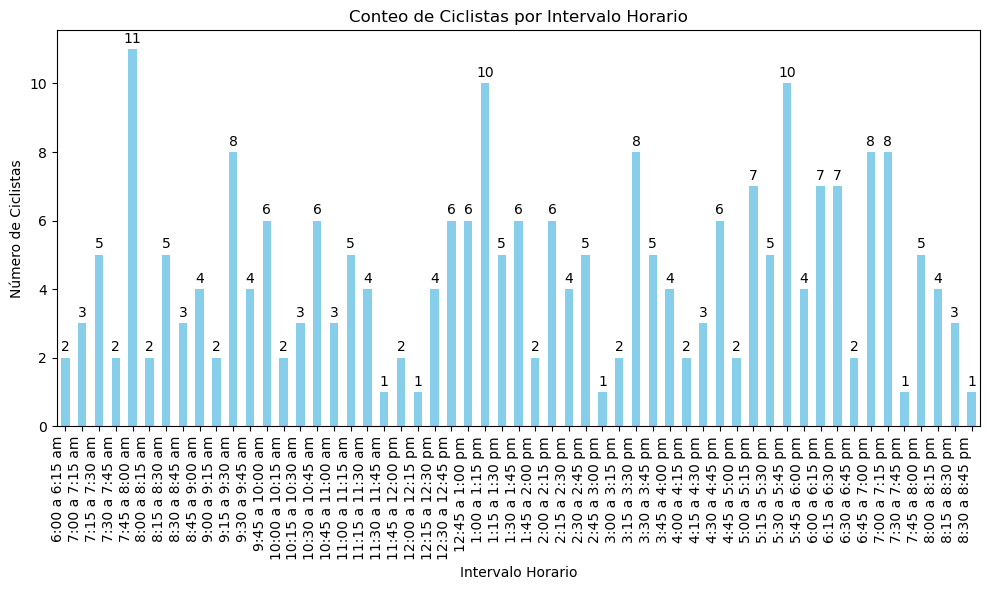

In [17]:
por_punto_datetime(47,aforos_20_df)